In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Load the dataset
data = pd.read_csv('Salary_dataset.csv') # replace with your file path and name

x_train = data['YearsExperience'].to_numpy(dtype=float)  # Features
y_train = data['Salary'].to_numpy(dtype=float)  # Target values

#Reshaping x_train and y_train
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_additional = np.array([[ 0.47], [ 1.12], [ 1.59], [ 2.04], [ 2.67], [ 3.14], [ 3.82], [ 4.29], [ 4.71], [ 5.08],
                         [ 5.65], [ 6.07], [ 6.42], [ 7.13], [ 7.68], [ 8.27], [ 8.89], [ 9.34], [ 9.92], [10.46],
                         [10.89], [11.27], [11.76], [12.31], [12.88], [13.43], [13.91], [14.29], [14.74], [15.22]])
y_additional = np.array([[ 25312.76], [ 30128.43], [ 34567.91], [ 39873.52], [ 45281.94], [ 50125.38], [ 56342.19],
                         [ 60213.87], [ 65389.45], [ 70124.67], [ 75391.84], [ 80458.29], [ 84926.12], [ 90631.47],
                         [ 95347.26], [100583.14], [106392.85], [110987.65], [116374.91], [121536.47], [125923.18],
                         [131278.94], [135632.51], [141092.78], [145238.64], [151627.29], [155842.16], [160783.49],
                         [165278.62], [171458.31]])

x_train = np.vstack((x_train, X_additional))
y_train = np.vstack((y_train, y_additional))

In [9]:
#Random initialization for weights and bias from x_train and y_train
w_initial = np.random.uniform(min(y_train) / max(x_train), max(y_train) / min(x_train))
b_initial = np.random.uniform(min(y_train), max(y_train))

#Function to calculate prediction
def compute_f_wb(w, x, b):
    return (w * x) + b

#Function to calculate the cost
def compute_cost(y, f_wb):
    return np.mean(np.square(f_wb - y)) / 2

#Function to calculate gradients
def compute_gradient(x, y, f_wb):
    error = f_wb - y
    dj_dw = np.sum(error * x) / len(y)
    dj_db = np.sum(error) / len(y)
    return dj_dw, dj_db

#Gradient Descent
def gradient_descent(x, y, w, b, alpha, tolerance=1e-6, max_iterations=1000):
    prev_cost = float('inf')
    for i in range(max_iterations):
        f_wb = compute_f_wb(w, x, b)
        dj_dw, dj_db = compute_gradient(x, y, f_wb)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(y, compute_f_wb(w, x, b))
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost
    return w, b

#Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, w, b, alpha, max_iterations=100):
    for i in range(max_iterations):
        for j in range(len(y)):
            idx = np.random.randint(0, len(y))
            x_i = x[idx:idx + 1]
            y_i = y[idx:idx + 1]
            f_wb = compute_f_wb(w, x_i, b)
            dj_dw, dj_db = compute_gradient(x_i, y_i, f_wb)
            w -= alpha * dj_dw
            b -= alpha * dj_db
    return w, b

#Mini-Batch Gradient Descent
def mini_batch_gradient_descent(x, y, w, b, alpha, batch_size=16, max_iterations=1000):
    for i in range(max_iterations):
        indices = np.random.permutation(len(y))
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for j in range(0, len(y), batch_size):
            x_batch = x_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]
            f_wb = compute_f_wb(w, x_batch, b)
            dj_dw, dj_db = compute_gradient(x_batch, y_batch, f_wb)
            w -= alpha * dj_dw
            b -= alpha * dj_db
    return w, b

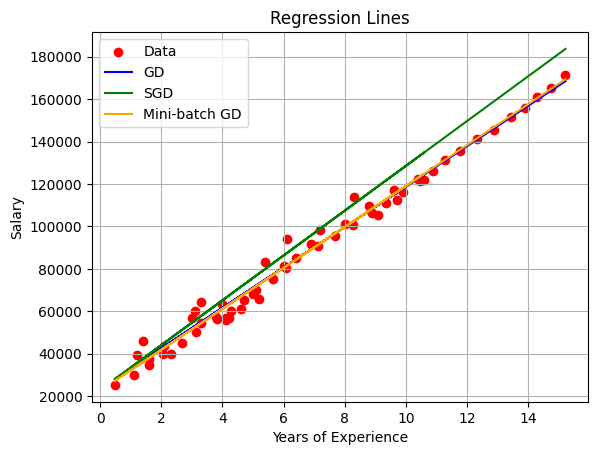

Gradient Descent -> w: [9641.32948964], b: [22620.48586801], Predicted Salary: [133495.77499891]
Stochastic Gradient Descent -> w: [9641.32948964], b: [22620.48586801], Predicted Salary: [133495.77499891]
Mini-Batch Gradient Descent -> w: [9641.32948964], b: [22620.48586801], Predicted Salary: [133495.77499891]


In [10]:
alpha = 0.01
tolerance = 1e-6
max_iterations = 1000

#Gradient Descent
w_gd, b_gd = gradient_descent(x_train, y_train, w_initial, b_initial, alpha, tolerance, max_iterations)
f_wb_gd = compute_f_wb(w_gd, x_train, b_gd)

#Stochastic Gradient Descent
w_sgd, b_sgd = stochastic_gradient_descent(x_train, y_train, w_initial, b_initial, alpha, max_iterations)
f_wb_sgd = compute_f_wb(w_sgd, x_train, b_sgd)

#Mini-Batch Gradient Descent
w_mbgd, b_mbgd = mini_batch_gradient_descent(x_train, y_train, w_initial, b_initial, alpha, batch_size=16, max_iterations=max_iterations)
f_wb_mbgd = compute_f_wb(w_mbgd, x_train, b_mbgd)

#Plot
plt.scatter(x_train, y_train, label="Data", color='red')
plt.plot(x_train, f_wb_gd, label="GD", color='blue')
plt.plot(x_train, f_wb_sgd, label="SGD", color='green')
plt.plot(x_train, f_wb_mbgd, label="Mini-batch GD", color='orange')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Regression Lines")
plt.legend()
plt.grid(True)
plt.show()

#Predict a salary for a specific number of years of experience
years_of_experience = 11.5
predicted_salary_gd = w_gd * years_of_experience + b_gd
predicted_salary_sgd = w_sgd * years_of_experience + b_sgd
predicted_salary_mbgd = w_mbgd * years_of_experience + b_mbgd

# Output Results
print(f"Gradient Descent -> w: {w_gd}, b: {b_gd}, Predicted Salary: {predicted_salary_gd}")
print(f"Stochastic Gradient Descent -> w: {w_sgd}, b: {b_sgd}, Predicted Salary: {predicted_salary_sgd}")
print(f"Mini-Batch Gradient Descent -> w: {w_mbgd}, b: {b_mbgd}, Predicted Salary: {predicted_salary_mbgd}")